<a href="https://colab.research.google.com/github/Atrodeon/sri/blob/main/sri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Instalação das bibliotecas
!pip install tensorflow
!pip install scikit-learn
!pip install opencv-python
!pip install pillow

# Importação das bibliotecas
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
import numpy as np
import os
from sklearn.neighbors import NearestNeighbors
from PIL import Image

In [2]:
# Montar o Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Carregar o modelo ResNet50 pré-treinado no ImageNet
# Incluir 'top=False' para remover a camada de classificação superior
model = ResNet50(weights='imagenet', include_top=False, pooling='avg')

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [4]:
# Função para carregar e pré-processar uma imagem
def load_and_preprocess_image(img_path):
    # Carregar a imagem, redimensionando para o tamanho esperado pelo ResNet50 (224x224)
    img = image.load_img(img_path, target_size=(224, 224))
    # Converter a imagem para array numpy
    img_array = image.img_to_array(img)
    # Adicionar uma dimensão de lote (batch)
    img_array_expanded = np.expand_dims(img_array, axis=0)
    # Pré-processar a imagem (normalização específica do ResNet)
    return preprocess_input(img_array_expanded)

# Função para extrair características de uma imagem
def extract_features(img_path, model):
    # Pré-processar a imagem
    processed_img = load_and_preprocess_image(img_path)
    # Extrair as características usando o modelo
    features = model.predict(processed_img)
    # Aplanar o vetor de características e retornar
    return features.flatten()

In [21]:
# Mude o caminho para o seu diretório de imagens no Google Drive
IMGS_DIR = '/content/drive/MyDrive/images'

# Lista de todos os caminhos de arquivos de imagem no diretório
image_paths = [os.path.join(IMGS_DIR, f) for f in os.listdir(IMGS_DIR) if f.endswith(('.png', '.jpg', '.jpeg'))]

# Extrair características para todas as imagens
print("Iniciando extração de características...")
all_features = []
valid_image_paths = []
for i, path in enumerate(image_paths):
    try:
        # Extrair características da imagem atual
        features = extract_features(path, model)
        all_features.append(features)
        valid_image_paths.append(path)
    except Exception as e:
        # Ignorar imagens que não puderam ser processadas
        print(f"Erro ao processar a imagem {path}: {e}")
        continue

# Converter a lista de características para um array numpy
all_features_np = np.array(all_features)
print(f"Extração concluída. Total de imagens processadas: {len(all_features_np)}")

Iniciando extração de características...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Extração concluída. Total de imagens processadas: 8


In [22]:
# Inicializar e 'treinar' o modelo NearestNeighbors
# Usaremos métrica 'cosine' para medir a similaridade entre os vetores de características
nn_model = NearestNeighbors(n_neighbors=5, algorithm='brute', metric='cosine')
nn_model.fit(all_features_np)

NearestNeighbors(algorithm='brute', metric='cosine')

In [23]:
# Mude o caminho para o seu diretório de imagens no Google Drive (caminho fornecido)
IMGS_DIR = '/content/drive/MyDrive/images'

# Lista de todos os caminhos de arquivos de imagem no diretório
image_paths = [os.path.join(IMGS_DIR, f) for f in os.listdir(IMGS_DIR) if f.endswith(('.png', '.jpg', '.jpeg'))]

# Extrair características para todas as imagens
print("Iniciando extração de características...")
all_features = []
valid_image_paths = []
for i, path in enumerate(image_paths):
    try:
        # Ferramenta: model
        features = extract_features(path, model)
        all_features.append(features)
        valid_image_paths.append(path)
    except Exception as e:
        print(f"Erro ao processar a imagem {path}: {e}")
        continue

# Converter a lista de características para um array numpy
all_features_np = np.array(all_features)
print(f"Extração concluída. Total de imagens processadas: {len(all_features_np)}")

# Treinar o modelo de similaridade novamente
nn_model = NearestNeighbors(n_neighbors=5, algorithm='brute', metric='cosine')
nn_model.fit(all_features_np)

Iniciando extração de características...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Extração concluída. Total de imagens processadas: 8


NearestNeighbors(algorithm='brute', metric='cosine')

In [24]:
# Função para encontrar produtos similares (reapresentada para contexto)
# def recommend_similar_products(query_img_path, nn_model, model, all_features_np, valid_image_paths):
#     ... (código da função)

# Exemplo de uso:
# Mude o nome do arquivo para uma imagem real dentro do seu diretório: /content/drive/MyDrive/images
QUERY_IMAGE_PATH = '/content/drive/MyDrive/images/rel1.jpg' # <--- CORRIJA ESTA LINHA COM O NOME DO ARQUIVO REAL

# Chamar a função de recomendação
recommendations = recommend_similar_products(QUERY_IMAGE_PATH, nn_model, model, all_features_np, valid_image_paths)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Imagem de Consulta: rel1.jpg

Produtos Recomendados (excluindo a própria imagem de consulta):
1. Produto: rel4.png | Similaridade (Distância Cosseno): 0.2227
2. Produto: rel10.jpg | Similaridade (Distância Cosseno): 0.3655
3. Produto: rel9.jpg | Similaridade (Distância Cosseno): 0.3656
4. Produto: rel2.png | Similaridade (Distância Cosseno): 0.3674


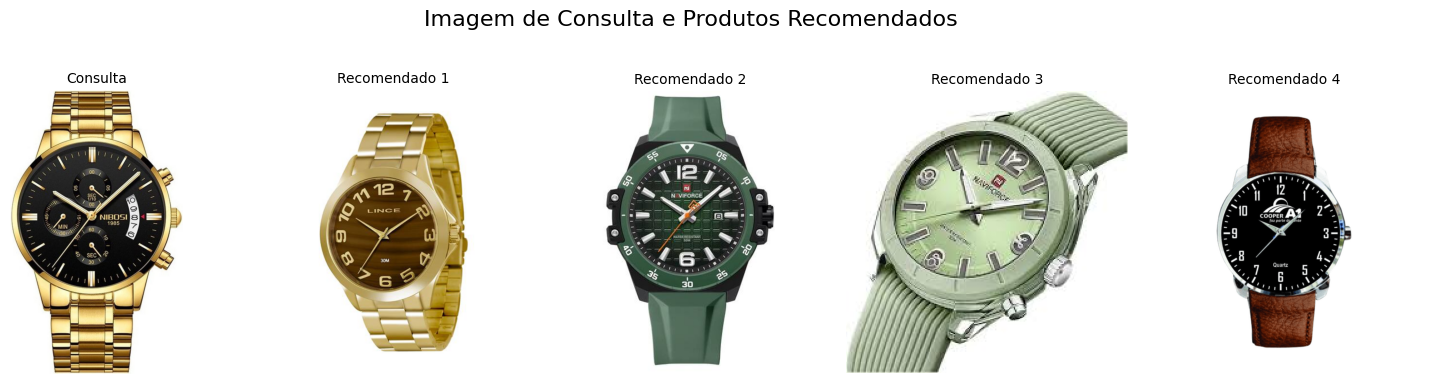

In [27]:
# Ferramenta: matplotlib
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

# Lista das imagens recomendadas do passo anterior:
# Certifique-se de que a variável 'recommendations' contenha os caminhos corretos.
# Usando o caminho base que definimos:
BASE_PATH = '/content/drive/MyDrive/images'

# Nomes dos arquivos recomendados (substitua pelos nomes reais que foram retornados,
# ou use a variável 'recommendations' se ela ainda estiver definida)
recommended_filenames = [
    'rel1.jpg', # Imagem de Consulta
    'rel4.png',
    'rel10.jpg',
    'rel9.jpg',
    'rel2.png'
]

# Recriando a lista de caminhos completos (assumindo que 'recommendations' não está mais disponível)
# Se 'recommendations' estiver disponível, use-a diretamente.
image_paths_to_show = [os.path.join(BASE_PATH, f) for f in recommended_filenames]

# Configurar o plot
n_images = len(image_paths_to_show)
fig, axes = plt.subplots(1, n_images, figsize=(3 * n_images, 4))
fig.suptitle('Imagem de Consulta e Produtos Recomendados', fontsize=16)

for i, img_path in enumerate(image_paths_to_show):
    try:
        img = Image.open(img_path)

        # Plotar a imagem
        axes[i].imshow(img)
        axes[i].axis('off') # Remover eixos

        # Título
        title = "Consulta" if i == 0 else f"Recomendado {i}"
        axes[i].set_title(title, fontsize=10)

    except FileNotFoundError:
        axes[i].text(0.5, 0.5, f"Erro: Arquivo não encontrado\n{img_path.split('/')[-1]}",
                     ha='center', va='center', fontsize=8, color='red')
        axes[i].axis('off')
    except Exception as e:
        axes[i].text(0.5, 0.5, f"Erro ao carregar imagem: {e}",
                     ha='center', va='center', fontsize=8, color='red')
        axes[i].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()